https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

fake_df["label"] = 0 # 가짜는 0
true_df["label"] = # 1 진짜는 1

df = pd.concat([fake_df, true_df])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SGD Classifier": SGDClassifier()
}

for name, model in models.items():
    print(f"모델: {name}")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"정확도: {acc:.4f}")
    print("분류 보고서:\n", report)


모델 Logistic Regression
정확도: 0.9850
분류 보고서:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.98      4270

    accuracy                           0.98      8980
   macro avg       0.98      0.99      0.98      8980
weighted avg       0.99      0.98      0.98      8980

모델 Naive Bayes
정확도: 0.9264
분류 보고서:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4710
           1       0.92      0.92      0.92      4270

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

모델 SGD Classifier
정확도: 0.9879
분류 보고서:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro 

https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv("WELFake_Dataset.csv", on_bad_lines="skip", encoding='utf-8')

df = df.dropna(subset=["text", "label"])

X = df["text"]
y = df["label"]  # 1: 진짜, 0: 가짜

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SGD Classifier": SGDClassifier()
}

for name, model in models.items():
    print(f"모델: {name}")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"정확도: {acc:.4f}")
    print("분류 보고서:\n", report)

모델 Logistic Regression
정확도: 0.9349
분류 보고서:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      7010
           1       0.93      0.94      0.94      7409

    accuracy                           0.93     14419
   macro avg       0.93      0.93      0.93     14419
weighted avg       0.93      0.93      0.93     14419

모델 Naive Bayes
정확도: 0.8380
분류 보고서:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      7010
           1       0.83      0.86      0.85      7409

    accuracy                           0.84     14419
   macro avg       0.84      0.84      0.84     14419
weighted avg       0.84      0.84      0.84     14419

모델 SGD Classifier
정확도: 0.9323
분류 보고서:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7010
           1       0.93      0.94      0.93      7409

    accuracy                           0.93     14419
   macro 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


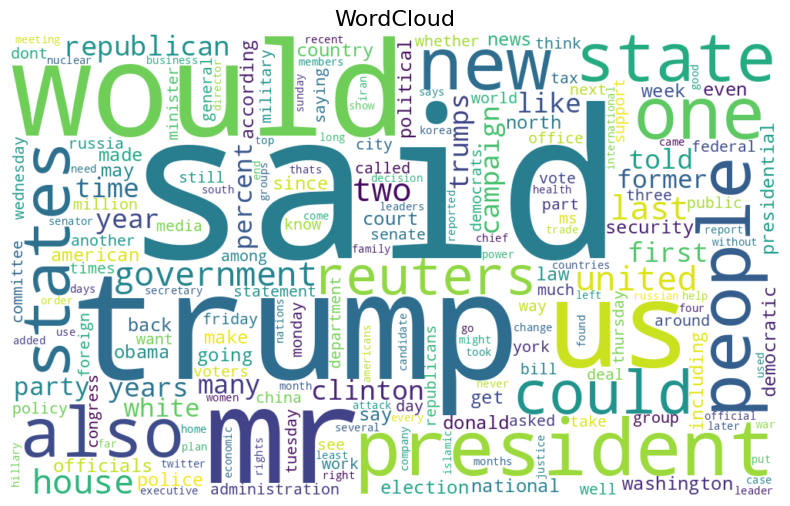

In [ ]:
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_csv("WELFake_Dataset.csv", on_bad_lines="skip", encoding='utf-8')
df = df.dropna(subset=["text", "label"])

fake_texts = df[df["label"] == 0]["text"]

def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    return [word for word in tokens if word not in stop_words and len(word) > 1]

word_counter = Counter()
for text in fake_texts:
    tokens = clean_and_tokenize(text)
    word_counter.update(tokens)

wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(word_counter)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud", fontsize=16)
plt.show()